In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import joblib
from flask import Flask, request, jsonify
from scipy.stats import zscore

In [18]:
#loading dataset
mentalhealth_dataset = pd.read_csv("../../flask/model/Student Depression Dataset.csv")

In [19]:
#print first 5 rows
mentalhealth_dataset.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [20]:
#print first 5 rows
mentalhealth_dataset.tail()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No,1
27900,140699,Male,27.0,Patna,Student,4.0,0.0,9.24,1.0,0.0,Less than 5 hours,Healthy,BCA,Yes,2.0,3.0,Yes,1


In [21]:
mentalhealth_dataset.shape

(27901, 18)

In [22]:

mentalhealth_dataset["Depression"].isna().any()


np.False_

In [23]:
# Drop irrelevant columns
mentalhealth_dataset = mentalhealth_dataset.drop(columns=['id', 'City', 'Profession','Work Pressure','Job Satisfaction'])

In [24]:
mentalhealth_dataset["Have you ever had suicidal thoughts ?"] = mentalhealth_dataset["Have you ever had suicidal thoughts ?"].replace({"Yes": 1, "No": 0})
mentalhealth_dataset["Family History of Mental Illness"] = mentalhealth_dataset["Family History of Mental Illness"].replace({"Yes": 1, "No": 0})


C:\Users\HP\AppData\Local\Temp\ipykernel_20108\3532642404.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mentalhealth_dataset["Have you ever had suicidal thoughts ?"] = mentalhealth_dataset["Have you ever had suicidal thoughts ?"].replace({"Yes": 1, "No": 0})
C:\Users\HP\AppData\Local\Temp\ipykernel_20108\3532642404.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mentalhealth_dataset["Family History of Mental Illness"] = mentalhealth_dataset["Family History of Mental Illness"].replace({"Yes": 1, "No": 0})


In [25]:
mentalhealth_dataset.head()

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,5.0,8.97,2.0,5-6 hours,Healthy,B.Pharm,1,3.0,1.0,0,1
1,Female,24.0,2.0,5.90,5.0,5-6 hours,Moderate,BSc,0,3.0,2.0,1,0
2,Male,31.0,3.0,7.03,5.0,Less than 5 hours,Healthy,BA,0,9.0,1.0,1,0
3,Female,28.0,3.0,5.59,2.0,7-8 hours,Moderate,BCA,1,4.0,5.0,1,1
4,Female,25.0,4.0,8.13,3.0,5-6 hours,Moderate,M.Tech,1,1.0,1.0,0,0


In [26]:
# Handle missing values
mentalhealth_dataset['Financial Stress'].fillna(mentalhealth_dataset['Financial Stress'].median(), inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_20108\3714808998.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mentalhealth_dataset['Financial Stress'].fillna(mentalhealth_dataset['Financial Stress'].median(), inplace=True)


In [27]:
# getting the statistical measures of the data
mentalhealth_dataset.describe()

,Age,Academic Pressure,CGPA,Study Satisfaction,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,25.822300,3.141214,7.656104,2.943837,0.632809,7.156984,3.139852,0.483961,0.585499
std,4.905687,1.381465,1.470707,1.361148,0.482048,3.707642,1.437270,0.499752,0.492645
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,21.000000,2.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000,0.000000
50%,25.000000,3.000000,7.770000,3.000000,1.000000,8.000000,3.000000,0.000000,1.000000
75%,30.000000,4.000000,8.920000,4.000000,1.000000,10.000000,4.000000,1.000000,1.000000
max,59.000000,5.000000,10.000000,5.000000,1.000000,12.000000,5.000000,1.000000,1.000000


In [28]:
mentalhealth_dataset['Depression'].value_counts()

Depression
1    16336
0    11565
Name: count, dtype: int64

In [29]:

# Identify numerical columns
num_cols = mentalhealth_dataset.select_dtypes(include=['number']).columns

# Compute Z-scores
z_scores = mentalhealth_dataset[num_cols].apply(zscore)

# Define threshold (3 is a standard value)
threshold = 3

# Filter data (keep only non-outliers)
mentalhealth_dataset_clean = mentalhealth_dataset[(z_scores < threshold).all(axis=1)]

# Save the cleaned dataset
mentalhealth_dataset_clean.to_csv("properly_cleaned_dataset.csv", index=False)

print(f"Original dataset: {mentalhealth_dataset.shape[0]} rows")
print(f"Cleaned dataset: {mentalhealth_dataset_clean.shape[0]} rows")


Original dataset: 27901 rows
Cleaned dataset: 27882 rows


In [31]:
# Load the cleaned dataset
cleaned_dataset = pd.read_csv("../../flask/model/Student Depression Dataset.csv")

# Check the new shape
print(f"✅ Cleaned dataset loaded: {cleaned_dataset.shape[0]} rows, {cleaned_dataset.shape[1]} columns")


✅ Cleaned dataset loaded: 27901 rows, 18 columns


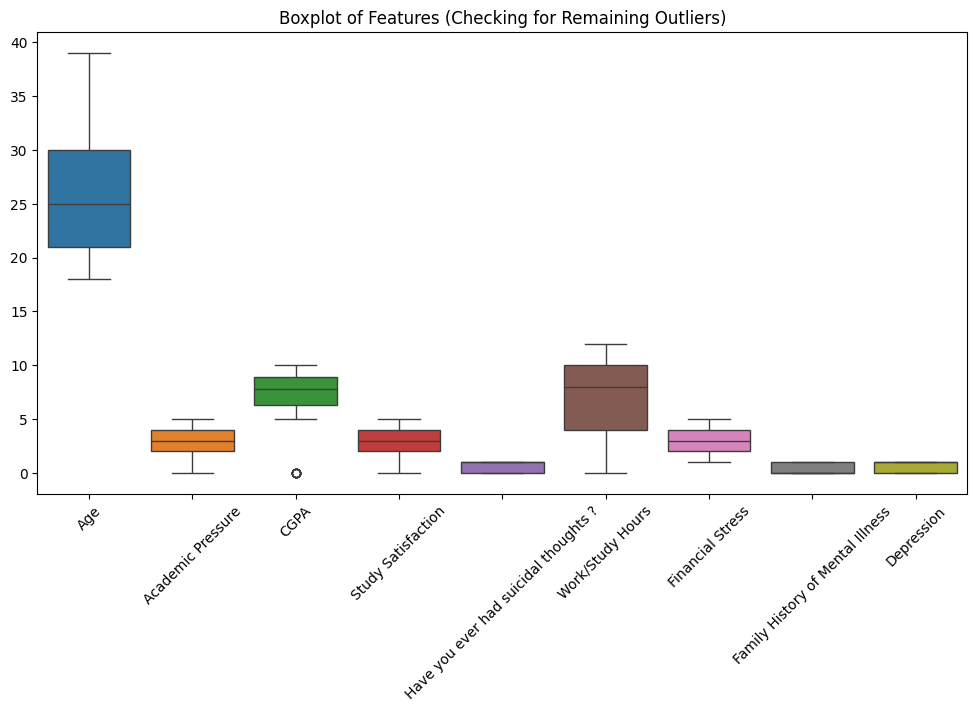

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned dataset
cleaned_data = pd.read_csv("properly_cleaned_dataset.csv")

# Plot boxplots for numerical columns to check for remaining outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=cleaned_data)
plt.xticks(rotation=45)
plt.title("Boxplot of Features (Checking for Remaining Outliers)")
plt.show()


In [36]:
from sklearn.preprocessing import LabelEncoder, RobustScaler

# Identify categorical columns
categorical_columns = cleaned_dataset.select_dtypes(include=['object']).columns.tolist()

# Apply Label Encoding to all categorical columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    cleaned_dataset[col] = le.fit_transform(cleaned_dataset[col].astype(str))
    label_encoders[col] = le  # Store encoders for future use

# Define features and target variable
X = cleaned_dataset.drop(columns=['Depression'])  # Features
y = cleaned_dataset['Depression']  # Target

# Scale numerical features using RobustScaler
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

print("✅ Data encoding and robust scaling completed successfully!")


✅ Data encoding and robust scaling completed successfully!


In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

print(f"✅ Data split done: Train - {X_train.shape[0]} rows, Test - {X_test.shape[0]} rows")


✅ Data split done: Train - 22320 rows, Test - 5581 rows


In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Define the model
model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)

model.fit(X_train, y_train)  # 🔴 Ensure the model is fitted

# Save the trained model
joblib.dump(model, "mental_health_model.pkl")

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')

# Print results
print(f"📊 Cross-Validation Accuracy Scores: {cv_scores}")
print(f"🏆 Mean Accuracy: {cv_scores.mean():.4f}")



📊 Cross-Validation Accuracy Scores: [0.83694678 0.84354839 0.84014337 0.83942652 0.84605735]
🏆 Mean Accuracy: 0.8412


In [41]:
import joblib

# Load the model
model = joblib.load("mental_health_model.pkl")

# Check if the model is fitted
if hasattr(model, "feature_importances_"):  
    print("✅ Model is properly loaded and fitted!")
else:
    print("❌ Model is not fitted. Retrain before saving.")


✅ Model is properly loaded and fitted!


In [42]:
import numpy as np

# Compute Z-scores for test set
z_scores_test = np.abs((X_test - X_test.mean()) / X_test.std())

# Count potential outliers (Z-score > 3)
outliers_test = (z_scores_test > 3).sum()

print(f"🚨 Potential outliers in test set (per feature):\n{outliers_test}")


🚨 Potential outliers in test set (per feature):
0


In [43]:
# Save the trained model
joblib.dump(model, "mental_health_model.pkl")

# Save the scaler (for future use)
joblib.dump(scaler, "scaler.pkl")

print("✅ Model and scaler saved successfully!")


✅ Model and scaler saved successfully!


In [44]:
print(cleaned_dataset.columns)

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')


In [ ]:
import joblib
import numpy as np
import pandas as pd

# Load the trained model and scaler
model = joblib.load("mental_health_model.pkl")
scaler = joblib.load("scaler.pkl")

# Define feature names (excluding 'Depression')
feature_names = [
    'Gender', 'Age', 'Academic Pressure', 'CGPA', 'Study Satisfaction',
    'Sleep Duration', 'Dietary Habits', 'Degree',
    'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
    'Financial Stress', 'Family History of Mental Illness'
]

def predict_depression(user_inputs):
    print("\nEnter the following details:")

    # Take user input for all required features
    # user_inputs = [
    #     int(input("Gender (1 for Male, 0 for Female): ")),  # Encode Gender as 1/0
    #     int(input("Age: ")),
    #     int(input("Academic Pressure level (1 to 10): ")),
    #     float(input("CGPA (e.g., 7.5): ")),
    #     int(input("Study Satisfaction level (1 to 10): ")),
    #     float(input("Sleep Duration (hours per day): ")),
    #     int(input("Dietary Habits (1: Poor, 2: Average, 3: Good): ")),
    #     int(input("Degree Type (1: Undergraduate, 2: Postgraduate, etc.): ")),  # Assuming categorical encoding
    #     int(input("Have you ever had suicidal thoughts? (1 for Yes, 0 for No): ")),
    #     int(input("Work/Study Hours per day: ")),
    #     float(input("Financial Stress Level (e.g., 3.5): ")),
    #     int(input("Family History of Mental Illness? (1 for Yes, 0 for No): "))
    # ]

    # Convert input to a DataFrame with proper column names
    user_data = pd.DataFrame([user_inputs], columns=feature_names)

    # Ensure input columns match the trained model's feature set
    user_data = user_data.reindex(columns=scaler.feature_names_in_, fill_value=0)

    # Transform and predict
    user_data_scaled = scaler.transform(user_data)
    prediction = model.predict(user_data_scaled)

    # Scale the input data
    user_data_scaled = scaler.transform(user_data)

    # Make a prediction
    prediction = model.predict(user_data_scaled)

    # Print result
    if prediction[0] == 1:
        return "🚨 The model predicts that the person may have depression."
    else:
        return "✅ The model predicts that the person is not suffering from depression."


# This will show the prediction result based on user input.